# Simple Linear Regression

**In this notebook, we will built a linear model to predict <b><u>Sales</u></b> using an appropriate predictor variable**.

1. Reading and Understanding the data

2. Training the model.

3. Residual analaysis.

4. Predicting on the test set and evaluating the test set

Basic therory :**Heteroscedasticity** is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity). To satisfy the regression assumptions and be able to trust the results, the residuals should have a constant variance.


In one word we can say that,
1. If the variance in the data is not constant then it is called Heteroscedasticity
2. If the variance in the data is constant then it is called Homoscendasticity

# Step 1 :- Reading and Understanding the data

**Lets start with the following steps**<br>
        1) Importing data using pandas library.<br>
        2) Understanding the structure of the data.<br>
        

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#read data
advertising = pd.read_csv('advertising.csv',index_col=False)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


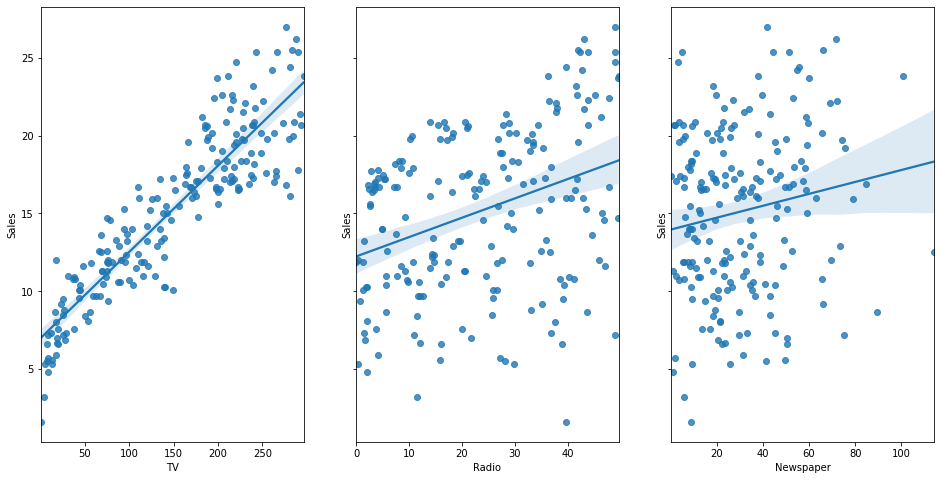

In [6]:
# visualize the dataset
a4_dims=(16,8)
fig,axes = plt.subplots(1,3,sharey=True,figsize=a4_dims)

sns.regplot(x = 'TV',y='Sales',data=advertising,ax=axes[0])
sns.regplot(x = 'Radio',y='Sales',data=advertising,ax=axes[1])
sns.regplot(x = 'Newspaper',y='Sales',data=advertising,ax=axes[2])

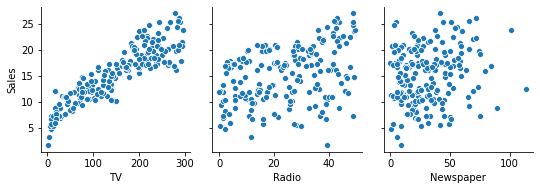

In [7]:
# another way to see for scatter plot using sns
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

In [8]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


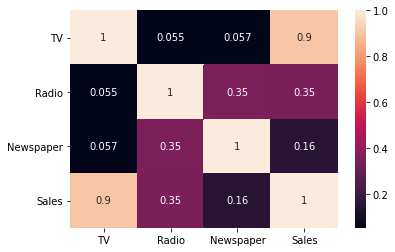

In [9]:
sns.heatmap(advertising.corr(),annot=True)

# Step2 :- Performing Simple Linear Regression

Equation of linear Regression<br>
$y= c + m_1x_1 + m_2x_2 + ... + m_nx_n$

- $y$ is the response
- $c$ is the response
- $m_1$ is the coefficient for the first feature
- $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

## Steps : 

- Create $X$ and $y$.
- Create train and test set (70-30 , 80-20)
- Train your model on training set (i.e learn the coefficients).
- Evaluate the model (training set, test set).


In [10]:
# so basically first see how our data looks like
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
#create x and y
X = advertising['TV']
y = advertising['Sales']

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.70, random_state=100)

In [13]:
#lets take a overiew of splittes data
X_train.shape,X_test.shape

((140,), (60,))

In [14]:
y_train.shape,y_test.shape

((140,), (60,))

In [15]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [16]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
# y = c + m1.X1
# y = c.const + m1.TV

**Here, OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.**

In [18]:
# fitting the model 
# RSS = (y_i - y(pred))^2
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
# Sales = 6.94+0.05.TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.52e-52
Time:                        11:32:53   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# 1. coef and p-value 
# 2. R-squared is 81.6%, very high
# 3. p(F-statistics) is low => the fit is not by chance
# These all are the interpretation of above given chance

**Now lets take a look at the above given summary**
    <img src = "x2.png">
                           

### F-Statistics

**F-statistic**  is similar in the sense that now instead of testing the significance of each of the betas, it tells you **whether the overall model fit is significant or not**. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.
<br>
<br>
The heuristic is similar to p-value calculation as well. If the 'Prob (F-statistic)' <u> is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data</u>. **In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05**.
<br>

### R-squared
R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good.

### Coefficients and p-values
The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant.

In [28]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

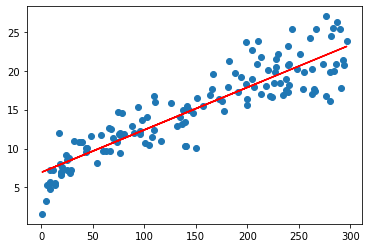

In [30]:
plt.scatter(X_train,y_train)
# plt.plot(X_train,6.9487+0.0545*X_train,'r') where y=mx+c ,here we predict y value by inputing x value 
plt.plot(X_train,y_train_pred,'r')
plt.show()

# Step 3 :-  Residual Analysis


In [31]:
# What we are going to do in Residual analysis?
# Answer :- Basically here we are interested in looking distribution on an error terms.

# What are error terms?
# Answer:- So basically we are going to do these analysis on the training set , 
#             1) y_train
#             2) y_train_pred
#  and the error will be basically between these two terms i.e (yactual-ypred)^2

In [32]:
res = y_train-y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual plot')

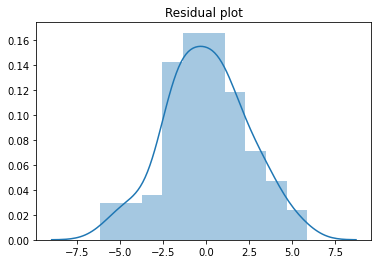

In [33]:
# plot the residual
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

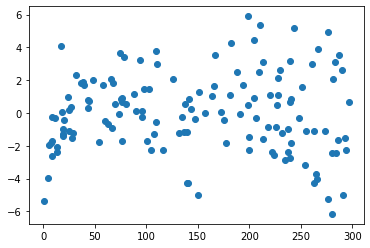

In [35]:
# look for patterns in residuals
plt.scatter(X_train,res)
plt.show()

# Step 4 :- Predictions and Evaluating on the Test Set

In [37]:
# predictions on the test set (y_test_pred)
# evaluate the model,r-squared , on the test

In [38]:
# add cons/intercept to test
X_test_sm = sm.add_constant(X_test)

# pred on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [42]:
# evaluate the model , r-squared , on the test
# r-squared
r2 = r2_score(y_true= y_test,y_pred=y_test_pred)
r2

0.7921031601245662

In [43]:
# r2 on training set
r2 = r2_score(y_true= y_train,y_pred=y_train_pred)
r2

0.8157933136480389

In [45]:
# mean-squared error
mean_squared_error(y_true = y_test,y_pred=y_test_pred)

4.077556371826948

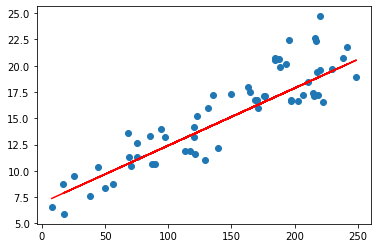

In [47]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()